# Insight: Education

## Open source code for extracting a  data insight 

This Jupyter notebook created to demonstrate how to download and analyse the underlying data, and identify the data insight

<img src="https://images.unsplash.com/photo-1523050854058-8df90110c9f1?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=1350&q=80" width ="1200" height=600 >
<span style="font-style:italic;">Photo by <a href="https://unsplash.com/@tombag?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Tomek Baginski</a> on <a href="https://unsplash.com/s/photos/education?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

## The insight generation process is divided into sub-tasks as shown below:
 1. Download data
 2. Explore data
 3. Extract/analyse data
 4. Visualize data

## Step 1 : Download data

First, we download "14100do0005_2014-19.xlsx" from Github (https://github.com/soda-lab/data-registry/) which is a copy of "*Education and Employment, ASGS and LGA, 2011, 2014-2019, 1410.0 - Data by Region, 2014-19*" data from the Australian Bureau of Statistics (**ABS**) [1]. 

- **Australian Beureau of Statistics (ABS)**: ABS is a national statistical agency in Australia. It provides a huge range of statistical data on economic, population, environmental, and social issues. The ABS also operates the national Census of Population and Housing that occurs every five years.

- **1410.0 - Data by Region, 2014-19:** Data provides region and local area data on population, economy, income, education and health that is collected from administrative datasets, the Census of Population and Housing, and various ABS surveys.

In [1]:
import pandas as pd

repository = 'https://github.com/soda-lab/data-registry/'
path = 'blob/main/original_data/'
dataset = '14100do0005_2014-19.xlsx'
raw = '?raw=ture'

url = repository + path + dataset + raw
xls = pd.ExcelFile(url)

In [3]:
# print sheet name
print(xls.sheet_names)

['Contents', 'Table 1', 'Table 2']


Data successfully loaded to the Jupyter notebook. The data includes "Contents", "Table 1", and "Table 2" (see above cell output)

## Step 2: Explore data

Before we start to extract insights from the dataset, we need to explore the dataset to identify potential insights that can be driven from the dataset. As you can see the below screenshot, the "Contents" sheet contains brief information about the dataset.  

**Data by Region, 2014-2019** contains two tables: 
- Table 1 contains "EDUCATION AND EMPLOYMENT" data by Australia, State and Territory, Statistical Area Levels 2-4, Greater Capital City Statistical Areas between 2014 and 2019
- Table 2 contains "EDUCATION AND EMPLOYMENT" data by Local Government Area (LGA) level between 2014 and 2019. 

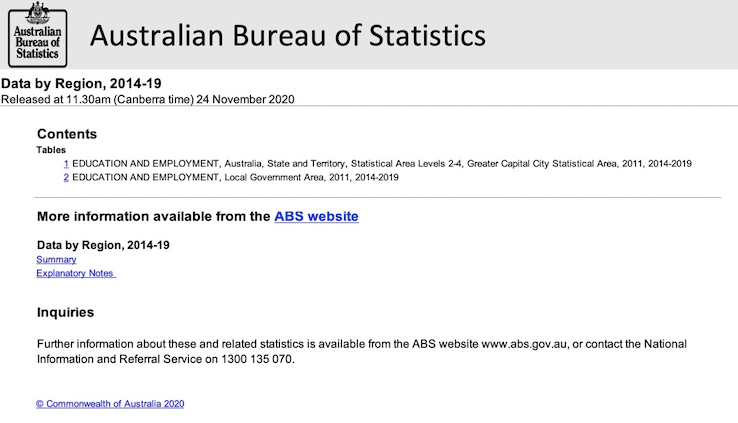

### Table 1 exploration

In [12]:
df1 = pd.read_excel(xls, sheet_name = 'Table 1', skiprows=6, header=0, index_col=0)
df1 = df1.dropna(subset=['Year'], how='all') # drop rows where it contains meaningless values
print(df1.shape)
df1

(19229, 88)


,Label,Year,4 year olds enrolled in preschool or in a preschool program (no.),5 year olds enrolled in preschool or in a preschool program (no.),Total enrolled in preschool (no.),Enrolled in preschool program within a long day care centre (no.),Children enrolled across more than one provider type (no.),Total enrolled in a preschool program (no.),Children attending preschool for less than 15 hours (no.),Children attending preschool for 15 hours or more (no.),...,Total population aged 15 years and over (no.),Managers (%),Professionals (%),Technicians and trades workers (%),Community and personal service workers (%),Clerical and administrative workers (%),Sales workers (%),Machinery operators and drivers (%),Labourers (%),Occupation of Employed Persons - Inadequately described (%)
Code,,,,,,,,,,,,,,,,,,,,,
0,Australia,2011.0,-,-,-,-,-,-,-,-,...,17363696,12.9,21.3,14.2,9.7,14.7,9.4,6.6,9.4,1.9
0,Australia,2014.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
0,Australia,2015.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
0,Australia,2016.0,268458,62215,144580,161029,25065,330676,71164,246861,...,19037277,13,22.2,13.5,10.8,13.6,9.4,6.3,9.5,1.7
0,Australia,2017.0,274114,65131,144602,168049,26590,339243,69657,255467,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901041004,Norfolk Island,2015.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
901041004,Norfolk Island,2016.0,-,-,-,-,-,-,-,-,...,1450,17.2,10.8,19,12,11.8,10.9,4,12.5,2.2
901041004,Norfolk Island,2017.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


As you can see the above data table contains 19,229 rows and 88 columns. The **Code** column contains digits indicating statistical areas used by the Australian Statistical Geography Standard (ASGS), and **Label** column contains the name of the statistical areas while other columns contain numeric values. We print all names of 99 columns in the below cell.

In [15]:
list(df1.columns)

['Label',
 'Year',
 '4 year olds enrolled in preschool or in a preschool program (no.)',
 '5 year olds enrolled in preschool or in a preschool program (no.)',
 'Total enrolled in preschool (no.)',
 'Enrolled in preschool program within a long day care centre (no.)',
 'Children enrolled across more than one provider type (no.)',
 'Total enrolled in a preschool program (no.)',
 'Children attending preschool for less than 15 hours (no.)',
 'Children attending preschool for 15 hours or more (no.)',
 'Taxpayers with Higher Education Loan Program (HELP) repayment (no.)',
 'Number of Jobs - Females',
 'Number of Jobs - Males',
 'Number of Jobs - Persons',
 'Number of Employee Jobs - Agriculture, forestry and fishing',
 'Number of Employee Jobs - Mining',
 'Number of Employee Jobs - Manufacturing',
 'Number of Employee Jobs - Electricity, gas water and waste services',
 'Number of Employee Jobs - Construction',
 'Number of Employee Jobs - Wholesale trade',
 'Number of Employee Jobs - Retail tr

### Table 2 exploration

In [20]:
df2 = pd.read_excel(xls, sheet_name = 'Table 2', skiprows=6, header=0, index_col=0)
df2 = df2.dropna(subset=['Year'], how='all') # drop rows where it contains meaningless values
print(df2.shape)
df2

(3808, 88)


,Label,Year,4 year olds enrolled in preschool or in a preschool program (no.),5 year olds enrolled in preschool or in a preschool program (no.),Total enrolled in preschool (no.),Enrolled in preschool program within a long day care centre (no.),Children enrolled across more than one provider type (no.),Total enrolled in a preschool program (no.),Children attending preschool for less than 15 hours (no.),Children attending preschool for 15 hours or more (no.),...,Total population aged 15 years and over (no.),Managers (%),Professionals (%),Technicians and trades workers (%),Community and personal service workers (%),Clerical and administrative workers (%),Sales workers (%),Machinery operators and drivers (%),Labourers (%),Occupation of Employed Persons - Inadequately described (%)
Code,,,,,,,,,,,,,,,,,,,,,
10050,Albury (C),2011.0,-,-,-,-,-,-,-,-,...,38510,11,18.9,15.2,10.7,13.9,10.8,7.3,10.6,1.6
10050,Albury (C),2014.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
10050,Albury (C),2015.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
10050,Albury (C),2016.0,580,224,392,289,123,814,330,457,...,41468,10.9,19.7,14.7,12.3,13.1,10.9,6.7,10.2,1.5
10050,Albury (C),2017.0,613,268,436,322,126,892,236,635,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99399,Unincorp. Other Territories,2015.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
99399,Unincorp. Other Territories,2016.0,45,-,43,-,-,47,9,33,...,3714,15.8,11,17.6,13.9,11.6,6,7.4,13.7,2.4
99399,Unincorp. Other Territories,2017.0,45,5,34,-,7,50,3,35,...,-,-,-,-,-,-,-,-,-,-


As you can see the above table, Table 2 contains exactly same columns as Table 1. However, the number of rows are much smaller than Table 1. It is because Table 2 contains Education and employment data by Local Government Area (LGA) level instead of other statistial area levels. 

## Step3: Extract/analyse data

After observation of two tables, we determined to analyse the highest year of school completed in 2016 by state and territory in Australia. Therefore, we need to extract data from Table 1 with following columns and rows:
- **Columns:**
    - 'Label'
    - 'Year'
    - 'Completed Year 8 or below (%)'
    - 'Completed Year 9 or equivalent (%)'
    - 'Completed Year 12 or equivalent (%)'
    - 'Completed Year 11 or equivalent (%)'
    - 'Completed Year 10 or equivalent (%)'
    - 'Did not go to school (%)'
    - 'Highest Year of School Completed - Not stated (%)'
- **Rows where "Label" values are :**
    - 'Australia'
    - 'New South Wales', 
    - 'Victoria',
    - 'Queensland',
    - 'South Australia',
    - 'Western Australia',
    - 'Tasmania',
    - 'Northern Territory',
    - 'Australian Capital Territory'

In [25]:
defined_columns = [
    'Label', 
    'Year',
    'Completed Year 8 or below (%)',
    'Completed Year 9 or equivalent (%)',
    'Completed Year 12 or equivalent (%)',
    'Completed Year 11 or equivalent (%)',
    'Completed Year 10 or equivalent (%)',
    'Did not go to school (%)',
    'Highest Year of School Completed - Not stated (%)',
    ]

In [26]:
defined_rows = [
    'Australia',
    'New South Wales', 
    'Victoria',
    'Queensland',
    'South Australia',
    'Western Australia',
    'Tasmania',
    'Northern Territory',
    'Australian Capital Territory'
]

In [27]:
defined_year = 2016

In [28]:
extracted_df = pd.DataFrame(columns=['Label'])
df1 = df1[defined_columns] # extract data by columns
for index, row in df1.iterrows():
    if row['Label'] in defined_rows and row['Year'] == defined_year: # extract data by rows and year
        extracted_df = extracted_df.append(row)    

extracted_df.Year = extracted_df.Year.astype(int) # convert data type to int
extracted_df = extracted_df.drop_duplicates(subset=['Label', 'Year'])# remove duplications

The above cell shows how to extract data by using python. We extracted rows and columns based on the defined list then excluded rows where year values are not equal to 2016. Finally, we removed all duplications in the extracted data. 

As you can see in the below table, each state and territory has 7 of "the highest year of school completed" as well as "Year" values. According to the extracted data, "**Completed Year 12 or equivalent**" column has the highest values across all states and territories following by "**Completed Year 10 or equivalent**" and "**Completed Year 11 or equivalent**". Meanwhile "**Did not go to school**" column has the lowest values. 

In [29]:
extracted_df

,Label,Completed Year 10 or equivalent (%),Completed Year 11 or equivalent (%),Completed Year 12 or equivalent (%),Completed Year 8 or below (%),Completed Year 9 or equivalent (%),Did not go to school (%),Highest Year of School Completed - Not stated (%),Year
0,Australia,19.2,9.1,51.9,4.8,5.6,0.9,8.6,2016
1,New South Wales,21.6,5.8,52.1,4.6,6.3,1.0,8.5,2016
2,Victoria,13.2,11.6,54.4,5.6,5.8,1.1,8.2,2016
3,Queensland,22.7,7.8,50.5,4.8,4.8,0.5,9.0,2016
4,South Australia,15.8,17.4,47.4,5.4,5.4,0.9,7.6,2016
5,Western Australia,20.6,10.0,51.7,3.2,4.5,0.6,9.4,2016
6,Tasmania,30.5,8.7,38.3,4.9,8.2,0.4,8.9,2016
7,Northern Territory,17.3,11.5,42.9,5.9,5.4,1.2,15.8,2016
8,Australian Capital Territory,12.9,4.8,69.4,2.4,3.4,0.4,6.7,2016


## Step4: Visualize data

Although the extracted data was presented in the table above, we would like to visualize the data with **Matplot** python library. We firstly draw a clustered bar chart excluding 'Australia'(national) row to compare values across states and territories. Then, we draw a bar chart with the 'Australia'(national) row.

- **Matplot** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

### State and territory level

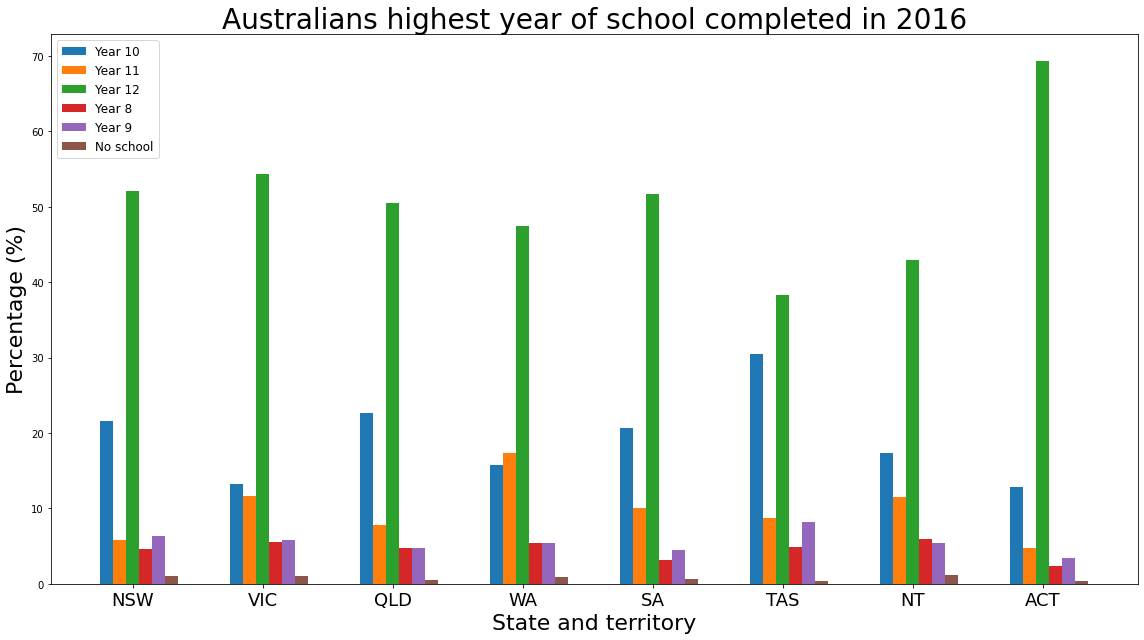

In [38]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

year_10 = tuple(extracted_df.iloc[1:, 1])
year_11 = tuple(extracted_df.iloc[1:, 2])
year_12 = tuple(extracted_df.iloc[1:, 3])
year_8 = tuple(extracted_df.iloc[1:, 4])
year_9 = tuple(extracted_df.iloc[1:, 5])
no_school = tuple(extracted_df.iloc[1:, 6])

ind = np.arange(len(year_10))  # the x locations for the groups
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, year_10, width/2,
                label='Year 10')
rects2 = ax.bar(ind - width/2, year_11, width/2,
                label='Year 11')
rects3 = ax.bar(ind , year_12, width/2,
                label='Year 12')
rects4 = ax.bar(ind + width/2, year_8, width/2,
                label='Year 8')
rects5 = ax.bar(ind + width, year_9, width/2,
                label='Year 9')
rects6 = ax.bar(ind + width*1.5, no_school, width/2,
                label='No school')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('State and territory', fontsize=22)
ax.set_ylabel('Percentage (%)', fontsize=22)
ax.set_title('Australians highest year of school completed in 2016', fontsize=28)
ax.set_xticks(ind)
ax.set_xticklabels(('NSW', 'VIC', 'QLD', 'WA', 'SA', 'TAS', 'NT', 'ACT'), fontsize=18)
ax.legend(fontsize=12)

fig.set_size_inches(16, 9)
fig.tight_layout()

plt.show()

As same as what we observed in the extracted data table, **Completed Year 12 or equivalent** (green bar)is the  greatest value across all states and territories followed by **Completed Year 10 or equivalent** (blue bar) and **Completed Year 11 or equivalent** (orange). Overall, ACT has the highest percentage of people who had completed year 12 (69.4%) while TAS has the lowest percentage (38.3%). 

### National level

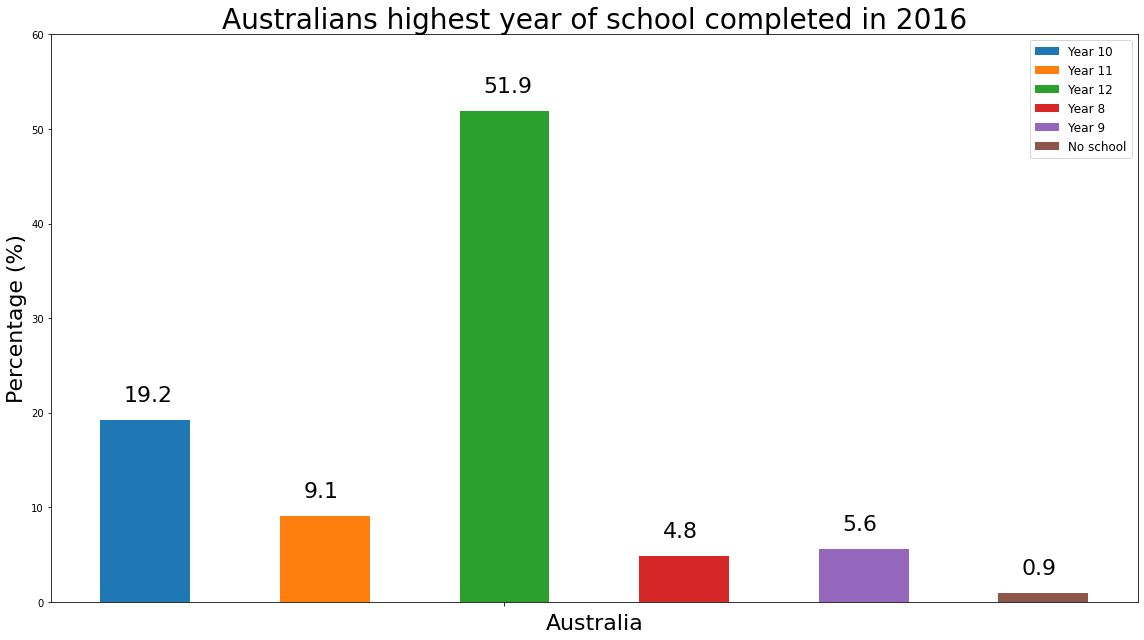

In [66]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

year_10 = tuple(extracted_df.iloc[:1, 1])
year_11 = tuple(extracted_df.iloc[:1, 2])
year_12 = tuple(extracted_df.iloc[:1, 3])
year_8 = tuple(extracted_df.iloc[:1, 4])
year_9 = tuple(extracted_df.iloc[:1, 5])
no_school = tuple(extracted_df.iloc[:1, 6])

ind = np.arange(len(year_10))  # the x locations for the groups
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, year_10, width/4,
                label='Year 10')
rects2 = ax.bar(ind - width/2, year_11, width/4,
                label='Year 11')
rects3 = ax.bar(ind , year_12, width/4,
                label='Year 12')
rects4 = ax.bar(ind + width/2, year_8, width/4,
                label='Year 8')
rects5 = ax.bar(ind + width, year_9, width/4,
                label='Year 9')
rects6 = ax.bar(ind + width*1.5, no_school, width/4,
                label='No school')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Australia', fontsize=22)
ax.set_ylabel('Percentage (%)', fontsize=22)
ax.set_title('Australians highest year of school completed in 2016', fontsize=28)
ax.set_xticks(ind)
ax.set_xticklabels((), fontsize=18)
ax.legend(fontsize=12)

# add labels
labels = [19.2, 9.1, 51.9, 4.8, 5.6, 0.9]
for index, value in enumerate(labels):
    plt.text(index/4-0.53, value+2, str(round(value, 2)), fontsize=22)

plt.ylim((0, 60))   # set the ylim to bottom, top    
    
fig.set_size_inches(16, 9)
fig.tight_layout()

plt.show()

As you can see above graph, 51.9% of Australians had completed year 12, 19.2% had completed Year 10, 9.1% had completed Year 11, 5.6% had completed Year 9, and 4.8% had completed Year 8 while 0.9% Australians did not go to school. 

With these findings, we can extract an insight: 

<div style="text-align: center;">
<span style="font-style:italic;font-size:2em;">  "Around 52 percent of Australians had completed Year 12 or equivalent in 2016 (ABS)" </span> </div>

## Conclusion

In this Jupyter notebook, we demonstrated how to download a dataset from Github and explore the dataset by using python code. *1410.0 - Data by Region, 2014-19, Education and Employmnet, ASGS and LGA, 2011, 2014-2019* contains two datasets about education and employment in Australia between 2014 and 2019. We used python code to extract a table from the datasets and visualize the table with two figures, then finally we identify the data insight **Around 52 percent of Australians had completed Year 12 or equivalent in 2016 (ABS)**. 

## References

[1] Australian Bureau of Statistics, *1410.0 - Data by Region, 2014-19, Population and People, ASGS and LGA, 2011, 2014-2019*, Australian Bureau of Statistics, 2020. [Dataset] Available:https://www.abs.gov.au/AUSSTATS/abs@.nsf/DetailsPage/1410.02014-19?OpenDocument. [Accessed: January 4, 2021].